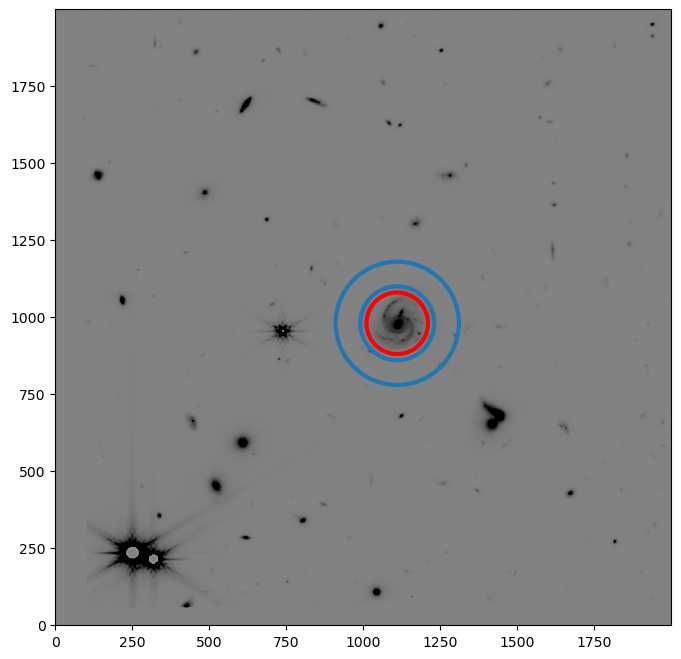

In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from photutils.aperture import CircularAnnulus
from photutils.aperture import CircularAperture

with fits.open(Path(Path.cwd()) / f"data/HST_JWST/jwst_f277W_crop.fits") as hdu:
    image = hdu[0].data

s = 5
vmin = np.mean(image) - s * np.std(image)
vmax = np.mean(image) + s * np.std(image)

aperture = CircularAperture([(1110, 980)], r=100)
bg_aperture = CircularAnnulus([(1110, 980)], r_in=120, r_out=200)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, vmin=vmin, vmax=vmax, cmap="gray_r", origin="lower")
aperture.plot(color="r", lw=3)
bg_aperture.plot(color="C0", lw=3)

In [9]:
from photutils.aperture import ApertureStats, aperture_photometry

phot_table = aperture_photometry(image, aperture)
flux = phot_table["aperture_sum"][0]
bg_stats = ApertureStats(image, bg_aperture)
bkg_mean = bg_stats.mean[0]
print(f"Measured flux: {flux:.3f}")
print(f"Background mean flux per pixel: {bkg_mean:.4f}")
print(f"Aperture Area: {aperture.area:.4f}")
final_flux = flux - bkg_mean * aperture.area
print(f"Final flux measurement: {final_flux:.3f}")

Measured flux: 8312.260
Background mean flux per pixel: 0.0075
Aperture Area: 31415.9265
Final flux measurement: 8077.380
